# IAT results

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
# Global settings for plot display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':12,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })


In [72]:
df = pd.read_csv('data/iat.csv')
df.head()

,gender,batch,iat_1,iat_2,iat_3,iat_4,iat_5,iat_6,iat_7,iat_8,...,iat_11,iat_12,iat_13,iat_14,iat_15,iat_16,iat_17,iat_18,iat_19,iat_20
0,F,Final,3,3,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,M,Final,3,1,0,1,1,2,2,2,...,2,3,3,3,2,1,2,2,2,1
2,M,Final,3,3,0,0,2,2,2,2,...,2,3,1,3,1,2,2,2,1,1
3,F,Final,5,5,1,4,3,5,3,5,...,1,1,1,1,1,5,5,1,1,1
4,F,Final,4,2,3,1,2,3,1,2,...,1,4,0,3,1,4,4,3,1,1


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  194 non-null    object
 1   batch   194 non-null    object
 2   iat_1   194 non-null    int64 
 3   iat_2   194 non-null    int64 
 4   iat_3   194 non-null    int64 
 5   iat_4   194 non-null    int64 
 6   iat_5   194 non-null    int64 
 7   iat_6   194 non-null    int64 
 8   iat_7   194 non-null    int64 
 9   iat_8   194 non-null    int64 
 10  iat_9   194 non-null    int64 
 11  iat_10  194 non-null    int64 
 12  iat_11  194 non-null    int64 
 13  iat_12  194 non-null    int64 
 14  iat_13  194 non-null    int64 
 15  iat_14  194 non-null    int64 
 16  iat_15  194 non-null    int64 
 17  iat_16  194 non-null    int64 
 18  iat_17  194 non-null    int64 
 19  iat_18  194 non-null    int64 
 20  iat_19  194 non-null    int64 
 21  iat_20  194 non-null    int64 
dtypes: int64(20), object(2)
me

First we need to do some calculations as per the instructions of the IAT 

#### Total IAT scores and category

In [74]:
df['total'] = df.iloc[:, 2:].sum(axis=1)
df.head()

,gender,batch,iat_1,iat_2,iat_3,iat_4,iat_5,iat_6,iat_7,iat_8,...,iat_12,iat_13,iat_14,iat_15,iat_16,iat_17,iat_18,iat_19,iat_20,total
0,F,Final,3,3,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,8
1,M,Final,3,1,0,1,1,2,2,2,...,3,3,3,2,1,2,2,2,1,38
2,M,Final,3,3,0,0,2,2,2,2,...,3,1,3,1,2,2,2,1,1,36
3,F,Final,5,5,1,4,3,5,3,5,...,1,1,1,1,5,5,1,1,1,51
4,F,Final,4,2,3,1,2,3,1,2,...,4,0,3,1,4,4,3,1,1,44


In [75]:
score_range = [0, 31, 50, 80, 100]
score_labels = ['Normal', 'Mild', 'Moderate', 'Severe']
df['total_cat'] = pd.cut(df['total'], bins=score_range, labels=score_labels, right=False)
df.head()

,gender,batch,iat_1,iat_2,iat_3,iat_4,iat_5,iat_6,iat_7,iat_8,...,iat_13,iat_14,iat_15,iat_16,iat_17,iat_18,iat_19,iat_20,total,total_cat
0,F,Final,3,3,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,8,Normal
1,M,Final,3,1,0,1,1,2,2,2,...,3,3,2,1,2,2,2,1,38,Mild
2,M,Final,3,3,0,0,2,2,2,2,...,1,3,1,2,2,2,1,1,36,Mild
3,F,Final,5,5,1,4,3,5,3,5,...,1,1,1,5,5,1,1,1,51,Moderate
4,F,Final,4,2,3,1,2,3,1,2,...,0,3,1,4,4,3,1,1,44,Mild


In [76]:
iat_total = df['total_cat'].value_counts() 
iat_total

total_cat
Mild        84
Normal      61
Moderate    45
Severe       4
Name: count, dtype: int64

Lets visualise it shall we?

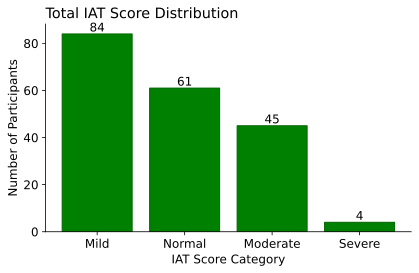

In [77]:
# plot
plt.figure(figsize=(6, 4))
bars = plt.bar(iat_total.index, iat_total.values, color='green', edgecolor='darkgreen')

# bar value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             f'{height}', ha='center', va='bottom')

# labels etc
plt.title('Total IAT Score Distribution', loc='left')
plt.xlabel('IAT Score Category')
plt.ylabel('Number of Participants')

# adjust layout and show
plt.tight_layout()
plt.show()

Proportion

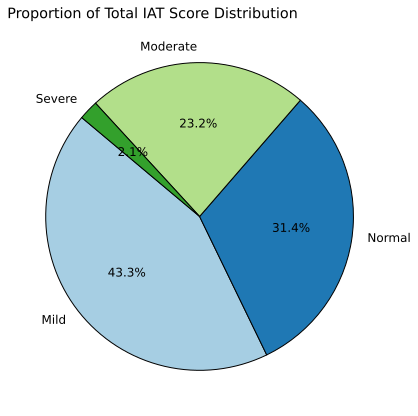

In [78]:
# plot
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(iat_total, labels=iat_total.index, 
                        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors,
                        labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))

# title
plt.title('Proportion of Total IAT Score Distribution')

# adjust layout and show
plt.tight_layout()
plt.show()

### Group comparisons

#### Batch

In [79]:
iat_batch = df.groupby(['total_cat', 'batch']).size().unstack()
iat_batch

/tmp/ipykernel_14962/3865082224.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iat_batch = df.groupby(['total_cat', 'batch']).size().unstack()


batch,Final,First
total_cat,,
Normal,26,35
Mild,25,59
Moderate,4,41
Severe,0,4


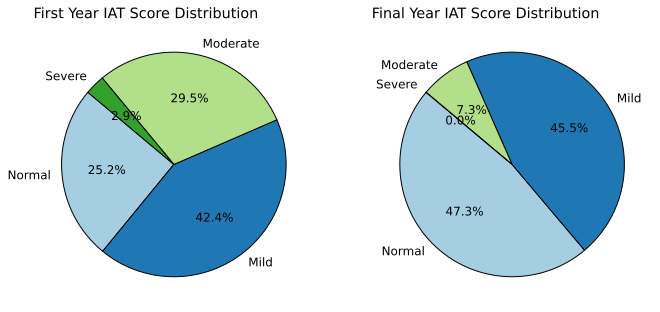

In [80]:
# plot
fig, axs = plt.subplots(1, 2, figsize=(10, 4.5), sharey=True)

# First pie (First years)
axs[0].pie(iat_batch['First'], labels=iat_batch.index, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))
axs[0].set_title('First Year IAT Score Distribution')

# Second pie (Final years)
axs[1].pie(iat_batch['Final'], labels=iat_batch.index, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))
axs[1].set_title('Final Year IAT Score Distribution')

# Adjust layout and show
plt.tight_layout()
plt.show()

#### Gender

In [81]:
iat_gender = df.groupby(['total_cat', 'gender']).size().unstack()
iat_gender

/tmp/ipykernel_14962/1133125269.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iat_gender = df.groupby(['total_cat', 'gender']).size().unstack()


gender,F,M
total_cat,,
Normal,35,26
Mild,30,54
Moderate,11,34
Severe,1,3


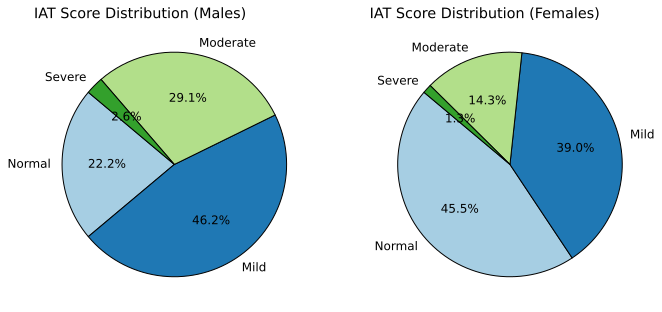

In [82]:
# plot
fig, axs = plt.subplots(1, 2, figsize=(10, 4.5), sharey=True)

# First pie (Males)
axs[0].pie(iat_gender['M'], labels=iat_gender.index, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))
axs[0].set_title('IAT Score Distribution (Males)')

# Second pie (Females)
axs[1].pie(iat_gender['F'], labels=iat_gender.index, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))
axs[1].set_title('IAT Score Distribution (Females)')

# Adjust layout and show
plt.tight_layout()
plt.show()

I've already shown you the OG pies for some other columns and pointed out the problems so no need to do that again unless there is something new to mention.

Now lets figure out the separate domain scoring:

## Domains

In [83]:
domain_dict = {'Salience': ['iat_10', 'iat_12', 'iat_13', 'iat_15', 'iat_19'],
                'Excessive Use': ['iat_1', 'iat_2', 'iat_14', 'iat_18', 'iat_20'],
                'Neglect Work': ['iat_6', 'iat_8', 'iat_9'],
                'Anticipation': ['iat_7', 'iat_11'], 
                'Lack of Control': ['iat_5', 'iat_16', 'iat_17'],
                'Neglect Social Life': ['iat_3', 'iat_4']}

Meanings of the aforementioned domains. (this send me down a round function spiral so note: we are doing standard rounding. not bankers rounding but standard rounding)

In [84]:
# Standard rounding: 0.5 and above rounds up, below 0.5 rounds down
def standard_round(x):
    return np.where(x >= 0, np.floor(x + 0.5), np.ceil(x - 0.5))


In [85]:
for domain, cols in domain_dict.items():
    df[domain] = (df[cols].sum(axis=1) / len(cols)).apply(standard_round).astype(int)

df.head()

,gender,batch,iat_1,iat_2,iat_3,iat_4,iat_5,iat_6,iat_7,iat_8,...,iat_19,iat_20,total,total_cat,Salience,Excessive Use,Neglect Work,Anticipation,Lack of Control,Neglect Social Life
0,F,Final,3,3,0,0,1,0,0,0,...,0,0,8,Normal,0,1,0,0,1,0
1,M,Final,3,1,0,1,1,2,2,2,...,2,1,38,Mild,2,2,2,2,1,1
2,M,Final,3,3,0,0,2,2,2,2,...,1,1,36,Mild,2,2,2,2,2,0
3,F,Final,5,5,1,4,3,5,3,5,...,1,1,51,Moderate,1,3,4,2,4,3
4,F,Final,4,2,3,1,2,3,1,2,...,1,1,44,Mild,2,3,2,1,3,2


so we could go on to the make the usual value counts, bar and pie charts for total numbers across domain scores and then do batch and gender comparisons that we've done for total iat scores and previous other columns. and actually thats what i did in the report too. but we've already understood enough about those things, so why don't we try something new? 

In [89]:
domains = domain_dict.keys()
domains

dict_keys(['Salience', 'Excessive Use', 'Neglect Work', 'Anticipation', 'Lack of Control', 'Neglect Social Life'])

In [90]:
# Convert list of series to DataFrame with domain names as index
domain_counts_df = pd.concat([df[domain].value_counts() for domain in domains], 
                            keys=domains, axis=1).sort_index()
domain_counts_df

,Salience,Excessive Use,Neglect Work,Anticipation,Lack of Control,Neglect Social Life
0,9,5,14,11,5,58
1,56,45,56,63,48,63
2,81,83,67,62,55,42
3,37,45,32,39,45,21
4,8,13,20,12,33,5
5,3,3,5,7,8,5


Lets visualise this:

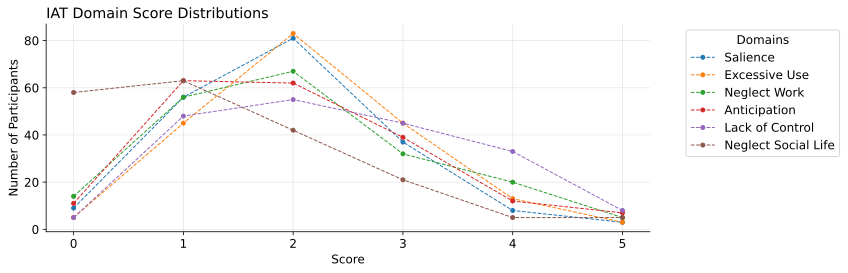

In [91]:
# Create line chart with domains as separate lines
plt.figure(figsize=(12, 4))

# Plot each domain as a separate line
for domain in domain_counts_df.columns:
    plt.plot(domain_counts_df.index, domain_counts_df[domain], marker='o', markersize=4, label=domain, linewidth=1, linestyle='--')

plt.title('IAT Domain Score Distributions')
plt.xlabel('Score')
plt.ylabel('Number of Participants')
plt.legend(title='Domains', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

okay so take a moment to really see this. what can you observe about the domain scores and trends? (remember the higher the score the bigger the problem in that domain):

- so except for neglect social life, all other domain follow a similar pattern. it seems like social life has good score (score = 0 means there's least neglect of social life) regardless of problems in other domains. 

- the majority of the participants fall in score = 2 meaning that domain has problems occasionally.  

now, we can use a similar chart for trends of domain scores between groups and we don't have to plot separate pie and bars for every single domain. but wait, didn't we say that between groups comparison with number is not really reliable? its not. and we are not going to use numbers. 

In [92]:
domain_final_df = df[['batch', 'Salience', 'Excessive Use', 'Neglect Work', 'Anticipation', 'Lack of Control', 'Neglect Social Life']].loc[df['batch']=='Final']
domain_final_df.head()

,batch,Salience,Excessive Use,Neglect Work,Anticipation,Lack of Control,Neglect Social Life
0,Final,0,1,0,0,1,0
1,Final,2,2,2,2,1,1
2,Final,2,2,2,2,2,0
3,Final,1,3,4,2,4,3
4,Final,2,3,2,1,3,2


In [93]:
domain_first_df = df[['batch', 'Salience', 'Excessive Use', 'Neglect Work', 'Anticipation', 'Lack of Control', 'Neglect Social Life']].loc[df['batch']=='First'].reset_index(drop=True)
domain_first_df.head()

,batch,Salience,Excessive Use,Neglect Work,Anticipation,Lack of Control,Neglect Social Life
0,First,1,1,1,1,1,1
1,First,4,3,4,2,4,2
2,First,2,4,3,5,4,3
3,First,1,2,2,1,2,2
4,First,1,3,3,1,3,1


In [96]:
# Convert list of series to DataFrame with domain names as index
final_domain_counts_df = pd.concat([domain_final_df[domain].value_counts() for domain in domains], 
                            keys=domains, axis=1).sort_index().fillna(0).astype(int)
final_domain_counts_df

,Salience,Excessive Use,Neglect Work,Anticipation,Lack of Control,Neglect Social Life
0,6,1,6,7,4,24
1,23,16,17,17,18,17
2,20,27,27,20,15,10
3,6,9,2,7,13,3
4,0,2,3,3,5,0
5,0,0,0,1,0,1


In [97]:
for domain in final_domain_counts_df.columns:
    final_domain_counts_df[domain] = final_domain_counts_df[domain] / final_domain_counts_df[domain].sum() * 100

final_domain_counts_df

,Salience,Excessive Use,Neglect Work,Anticipation,Lack of Control,Neglect Social Life
0,10.909091,1.818182,10.909091,12.727273,7.272727,43.636364
1,41.818182,29.090909,30.909091,30.909091,32.727273,30.909091
2,36.363636,49.090909,49.090909,36.363636,27.272727,18.181818
3,10.909091,16.363636,3.636364,12.727273,23.636364,5.454545
4,0.000000,3.636364,5.454545,5.454545,9.090909,0.000000
5,0.000000,0.000000,0.000000,1.818182,0.000000,1.818182


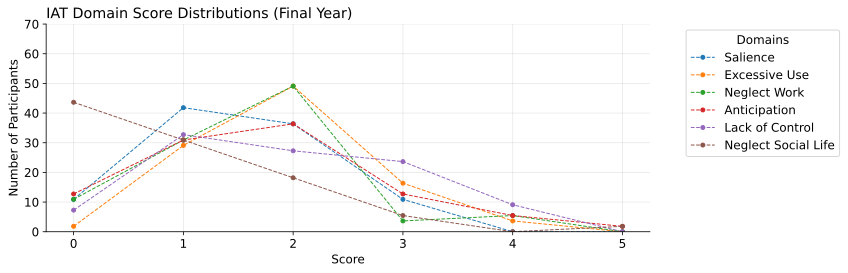

In [98]:
# Create line chart with domains as separate lines
plt.figure(figsize=(12, 4))

# Plot each domain as a separate line
for domain in final_domain_counts_df.columns:
    plt.plot(final_domain_counts_df.index, final_domain_counts_df[domain], marker='o', markersize=4, label=domain, linewidth=1, linestyle='--')

plt.title('IAT Domain Score Distributions (Final Year)')
plt.xlabel('Score')
plt.ylabel('Number of Participants')
plt.legend(title='Domains', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.ylim(0, 70)

plt.tight_layout()
plt.show()

In [99]:
# Convert list of series to DataFrame with domain names as index
first_domain_counts_df = pd.concat([domain_first_df[domain].value_counts() for domain in domains], 
                            keys=domains, axis=1).sort_index()
first_domain_counts_df

,Salience,Excessive Use,Neglect Work,Anticipation,Lack of Control,Neglect Social Life
0,3,4,8,4,1,34
1,33,29,39,46,30,46
2,61,56,40,42,40,32
3,31,36,30,32,32,18
4,8,11,17,9,28,5
5,3,3,5,6,8,4


In [100]:
for domain in first_domain_counts_df.columns:
    first_domain_counts_df[domain] = first_domain_counts_df[domain] / first_domain_counts_df[domain].sum() * 100

first_domain_counts_df

,Salience,Excessive Use,Neglect Work,Anticipation,Lack of Control,Neglect Social Life
0,2.158273,2.877698,5.755396,2.877698,0.719424,24.460432
1,23.741007,20.863309,28.057554,33.093525,21.582734,33.093525
2,43.884892,40.287770,28.776978,30.215827,28.776978,23.021583
3,22.302158,25.899281,21.582734,23.021583,23.021583,12.949640
4,5.755396,7.913669,12.230216,6.474820,20.143885,3.597122
5,2.158273,2.158273,3.597122,4.316547,5.755396,2.877698


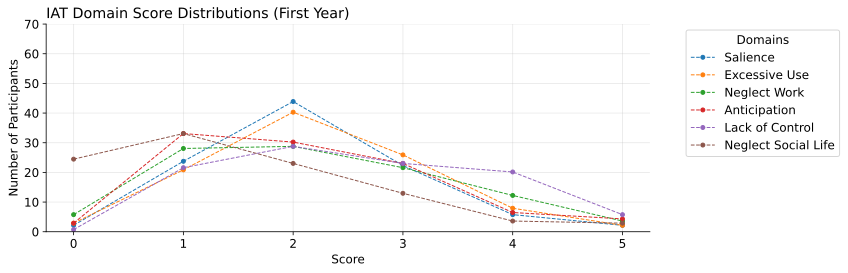

In [101]:
# Create line chart with domains as separate lines
plt.figure(figsize=(12, 4))

# Plot each domain as a separate line
for domain in domain_counts_df.columns:
    plt.plot(first_domain_counts_df.index, first_domain_counts_df[domain], marker='o', markersize=4, label=domain, linewidth=1, linestyle='--')

plt.title('IAT Domain Score Distributions (First Year)')
plt.xlabel('Score')
plt.ylabel('Number of Participants')
plt.legend(title='Domains', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.ylim(0, 70)

plt.tight_layout()
plt.show()

we used the same y-axis ticks for both figures to make the percentages comparable.

We can do the same thing for genders. Try it yourself?